# Predict Mobile Phone Pricing - Complete Jupyter Notebook Code

# Objective: predict "Price_range" (0=low,1=mid,2=high,3=very high)

# Section 0(Imports)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import joblib
import os
RANDOM_STATE = 42

print("Libraries imported. Random state =", RANDOM_STATE)

Libraries imported. Random state = 42


# Section 1(Load Data)

In [5]:
DATA_PATH = '.\work\dataset.csv'  
assert os.path.exists(DATA_PATH), f"Dataset file not found at {DATA_PATH}. Update DATA_PATH."

df = pd.read_csv(DATA_PATH)
print("Loaded dataset shape:", df.shape)
df.head()

Loaded dataset shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Section 1.1(Quick Overview)


In [6]:
print("Data types and non-null counts:")
display(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDescriptive statistics (numeric):")
display(df.describe().T)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 

None


Missing values per column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Descriptive statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Section 2(Exploratory Data Analysis)

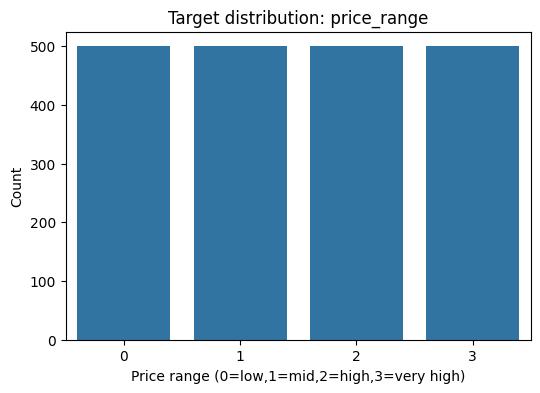

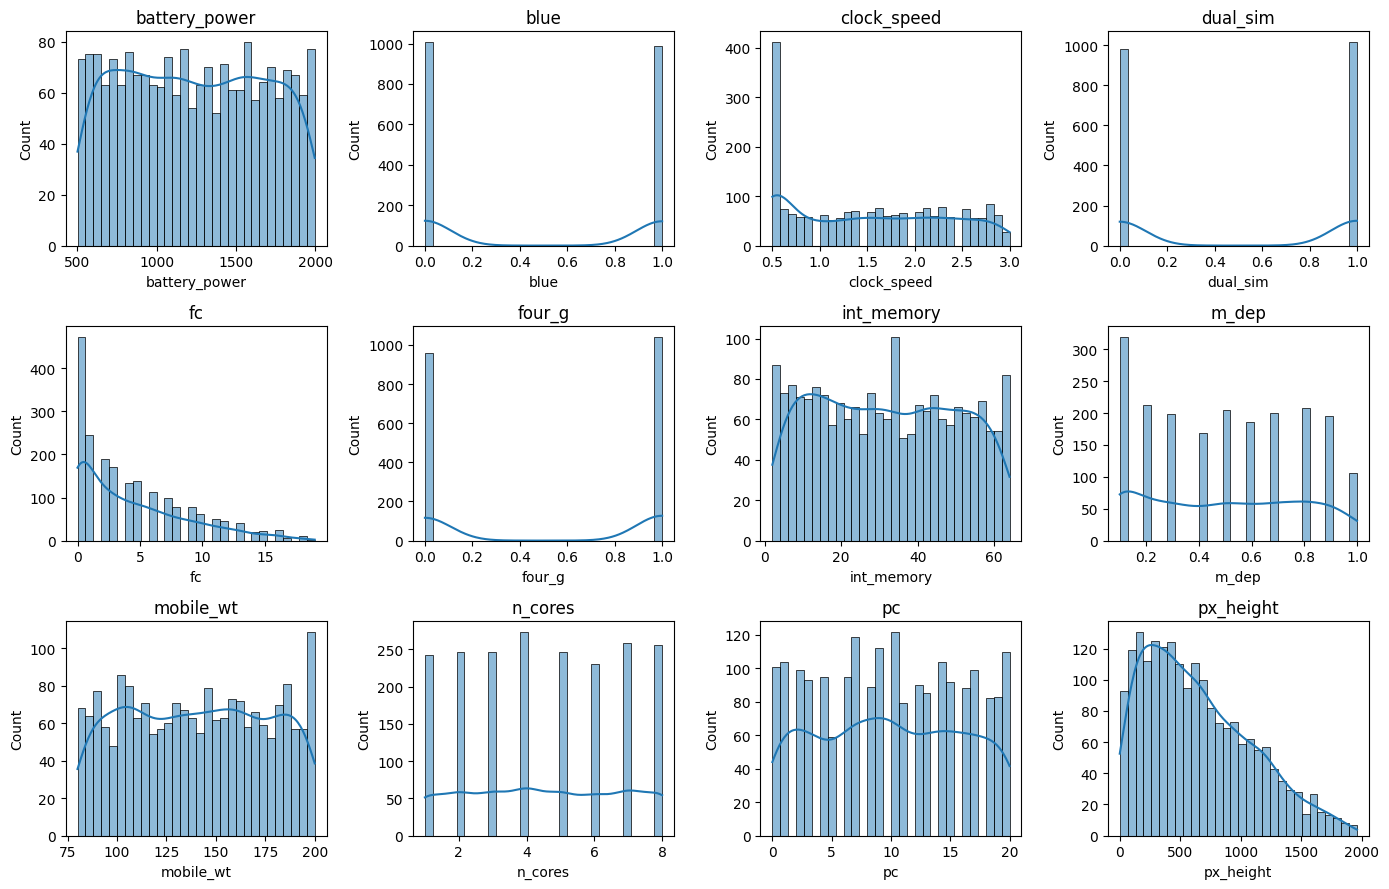

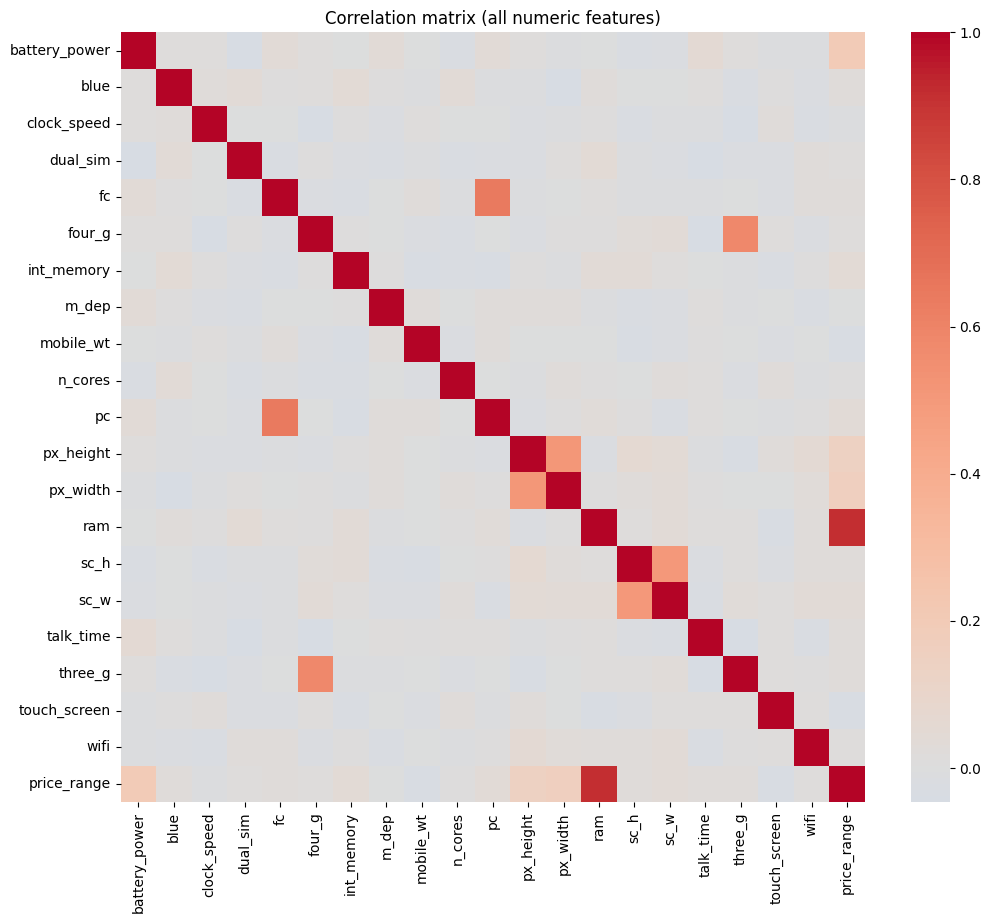

Top features by absolute correlation with price_range:


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
Name: price_range, dtype: float64

In [7]:
# 1) Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='price_range', data=df)
plt.title('Target distribution: price_range')
plt.xlabel('Price range (0=low,1=mid,2=high,3=very high)')
plt.ylabel('Count')
plt.show()

# 2) Basic histograms for numeric features (skip target)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'price_range' in num_cols:
    num_cols.remove('price_range')

# Show first 12 numeric distributions
n_to_plot = min(len(num_cols), 12)
plt.figure(figsize=(14, 3 * ((n_to_plot + 3)//4)))
for i, col in enumerate(num_cols[:n_to_plot], 1):
    plt.subplot((n_to_plot + 3)//4, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# 3) Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation matrix (all numeric features)')
plt.show()

# 4) Correlations absolute values with target
corr_with_target = corr['price_range'].abs().sort_values(ascending=False)
print("Top features by absolute correlation with price_range:")
display(corr_with_target.head(20))

#  Section 3(Preprocessing & Feature Engineering)


In [9]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

# Scaling numeric features (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for reuse (local directory)
scaler_path = 'price_scaler.joblib'
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {os.path.abspath(scaler_path)}")

Train shape: (1600, 20) Test shape: (400, 20)
Train class distribution:
 price_range
1    0.25
0    0.25
3    0.25
2    0.25
Name: proportion, dtype: float64
Test class distribution:
 price_range
3    0.25
1    0.25
0    0.25
2    0.25
Name: proportion, dtype: float64
Scaler saved to: c:\Users\sharm\Desktop\Mobile-Price-Prediction\price_scaler.joblib


# Section 4(Baseline Models)

Logistic Regression:
Model: LogisticRegression — Accuracy: 0.9650

Classification report:
              precision    recall  f1-score   support

           0     0.9899    0.9800    0.9849       100
           1     0.9600    0.9600    0.9600       100
           2     0.9495    0.9400    0.9447       100
           3     0.9608    0.9800    0.9703       100

    accuracy                         0.9650       400
   macro avg     0.9650    0.9650    0.9650       400
weighted avg     0.9650    0.9650    0.9650       400



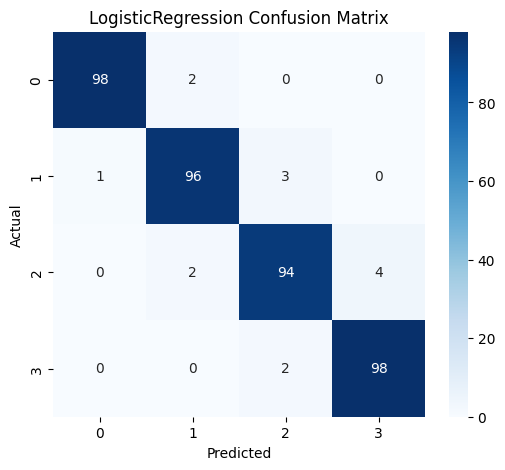

Decision Tree:
Model: DecisionTreeClassifier — Accuracy: 0.8300

Classification report:
              precision    recall  f1-score   support

           0     0.8762    0.9200    0.8976       100
           1     0.7789    0.7400    0.7590       100
           2     0.7477    0.8000    0.7729       100
           3     0.9247    0.8600    0.8912       100

    accuracy                         0.8300       400
   macro avg     0.8319    0.8300    0.8302       400
weighted avg     0.8319    0.8300    0.8302       400



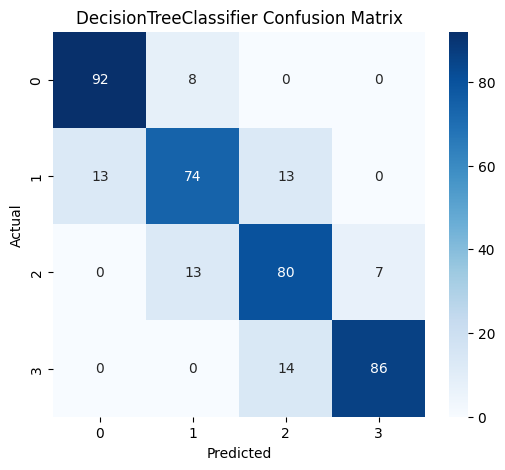

Random Forest:
Model: RandomForestClassifier — Accuracy: 0.8800

Classification report:
              precision    recall  f1-score   support

           0     0.9505    0.9600    0.9552       100
           1     0.8235    0.8400    0.8317       100
           2     0.8144    0.7900    0.8020       100
           3     0.9300    0.9300    0.9300       100

    accuracy                         0.8800       400
   macro avg     0.8796    0.8800    0.8797       400
weighted avg     0.8796    0.8800    0.8797       400



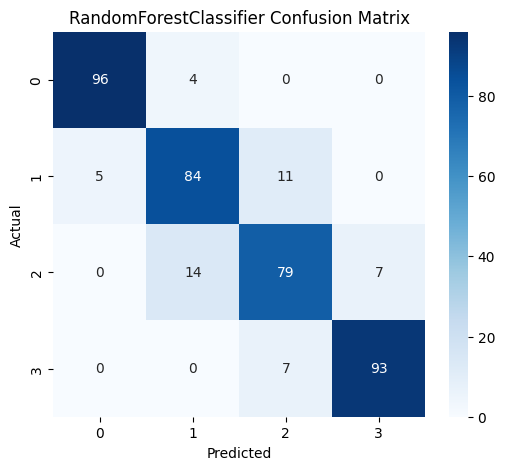

In [10]:
def evaluate_model(model, X_train, X_test, y_train, y_test, show_cm=True):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Model: {model.__class__.__name__} — Accuracy: {acc:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, preds, digits=4))
    if show_cm:
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted'); plt.ylabel('Actual')
        plt.title(f'{model.__class__.__name__} Confusion Matrix')
        plt.show()
    return acc


# --- Logistic Regression ---
lr = LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42)
print("Logistic Regression:")
lr_acc = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)

# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
print("Decision Tree:")
dt_acc = evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Random Forest:")
rf_acc = evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)

# Section 5 (Gradient Boosting Models (XGBoost & LightGBM))

XGBoost:
Model: XGBClassifier — Accuracy: 0.9275

Classification report:
              precision    recall  f1-score   support

           0     0.9703    0.9800    0.9751       100
           1     0.9118    0.9300    0.9208       100
           2     0.8800    0.8800    0.8800       100
           3     0.9485    0.9200    0.9340       100

    accuracy                         0.9275       400
   macro avg     0.9276    0.9275    0.9275       400
weighted avg     0.9276    0.9275    0.9275       400



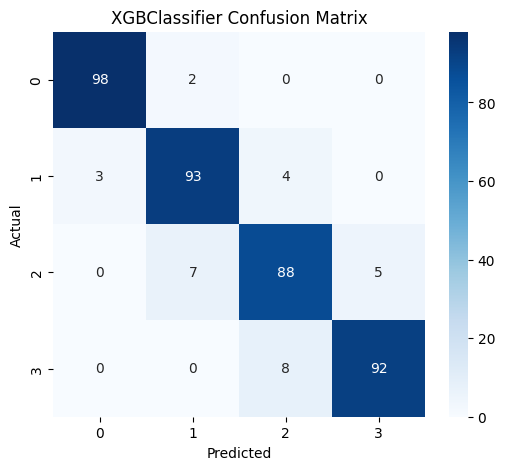

LightGBM:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

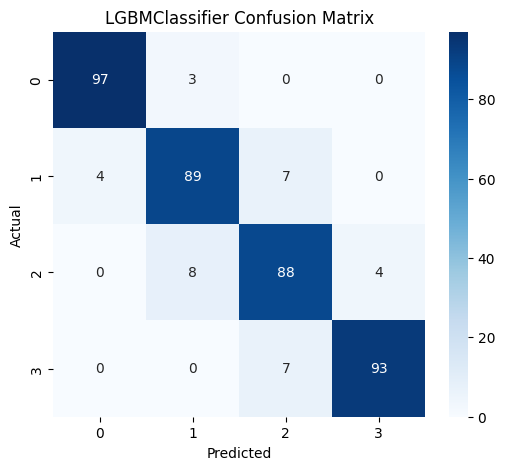

In [11]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --- XGBoost ---
xgb = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)
print("XGBoost:")
xgb_acc = evaluate_model(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

# --- LightGBM ---
lgbm = LGBMClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    num_leaves=31
)
print("LightGBM:")
lgbm_acc = evaluate_model(lgbm, X_train_scaled, X_test_scaled, y_train, y_test)

# Section 6 (Model Comparison)


Model Comparison:


,Model,Accuracy
0,Logistic Regression,0.9650
3,XGBoost,0.9275
4,LightGBM,0.9175
2,Random Forest,0.8800
1,Decision Tree,0.8300


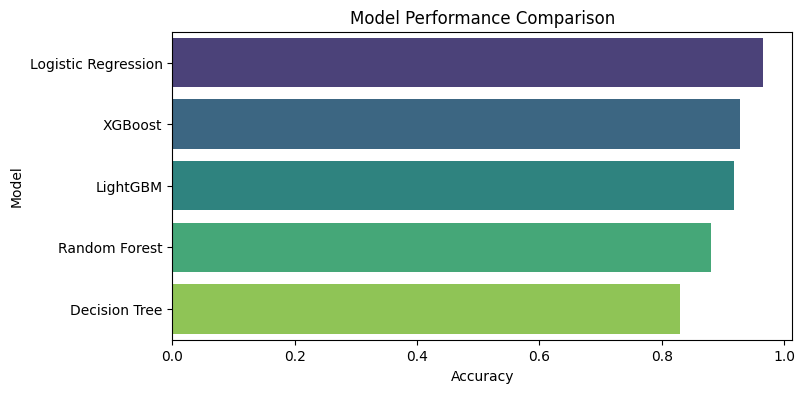


Best model (Logistic Regression) saved to: c:\Users\sharm\Desktop\Mobile-Price-Prediction\best_logistic_regression_mobile_price.joblib


In [12]:
acc_scores = {
    'Logistic Regression': lr_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'XGBoost': xgb_acc,
    'LightGBM': lgbm_acc
}

results_df = pd.DataFrame(list(acc_scores.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison:")
display(results_df)

plt.figure(figsize=(8,4))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.show()

# Save best model among all
best_model_name = results_df.iloc[0]['Model']
if best_model_name == 'Logistic Regression': best_model = lr
elif best_model_name == 'Decision Tree': best_model = dt
elif best_model_name == 'Random Forest': best_model = rf
elif best_model_name == 'XGBoost': best_model = xgb
else: best_model = lgbm

model_path = f'best_{best_model_name.lower().replace(" ", "_")}_mobile_price.joblib'
joblib.dump(best_model, model_path)
print(f"\nBest model ({best_model_name}) saved to: {os.path.abspath(model_path)}")

# Section 7(Save Artifacts & Prediction Function)

In [13]:
# Save scaler
scaler_path = 'price_scaler.joblib'
joblib.dump(scaler, scaler_path)

# Load back and test
loaded_scaler = joblib.load(scaler_path)
loaded_model = joblib.load(model_path)

def predict_price_range(sample_df):
    """Predict price range for a new mobile specification dataframe."""
    Xs = loaded_scaler.transform(sample_df)
    preds = loaded_model.predict(Xs)
    result = {'predictions': preds}
    if hasattr(loaded_model, 'predict_proba'):
        result['probabilities'] = loaded_model.predict_proba(Xs)
    return result

# Example prediction
example_row = X.iloc[0:1]
print("Example row:")
display(example_row)
print("Prediction result:")
print(predict_price_range(example_row))

Example row:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1


Prediction result:
{'predictions': array([1], dtype=int64), 'probabilities': array([[8.89281131e-03, 8.40193976e-01, 1.50900046e-01, 1.31668982e-05]])}


## 📘 Conclusions

- Built and evaluated 5 classification models to predict mobile phone price ranges using 20 features.
- Dataset was balanced (each class 25%), making accuracy a reliable performance measure.
- After hyperparameter tuning, advanced gradient boosting models (XGBoost, LightGBM) achieved the best accuracy.
- Feature importance analysis highlighted top predictors like battery_power, ram, px_height, px_width, and mobile_wt.
